<a href="https://colab.research.google.com/github/mdnasiruddin733/ann-thesis/blob/main/ArtificialNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Steps to be follwed:**
> 

*   Import necessary packages
*   Load Data
*   Define Keras Model
*   Compile Keras Model
*   Fit Keras Model
*   Evaluate Keras Model
*   Make Predictions


















In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Importing necessary packages and modules**


In [50]:
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import numpy as np


## **Loading data from our data.csv file** 

In [51]:
url="/content/drive/MyDrive/coxbazar-data.csv"
df=pd.read_csv(url)
print(df.shape)

(71, 5)


## **Splitting dataset into input and output columns** 

In [72]:

input_col=df.iloc[:,0:3]
output_col=df.iloc[:,3:5]

print(output_col)

    ll  pl
0   40  23
1   43  26
2   39  21
3   62  33
4   38  22
..  ..  ..
66  48  25
67  38  21
68  45  23
69  35  20
70  30  16

[71 rows x 2 columns]


# **Splitting Training and Testing Data**


In [73]:
x_train,x_test,y_train,y_test=train_test_split(input_col,output_col,test_size=0.20)

## **Defining and compiling keras model** 

In [74]:

#defining layers
model = Sequential()
model.add(Dense(units=30,kernel_initializer='normal', activation='relu'))
model.add(Dense(units=30,kernel_initializer='normal',activation="relu"))
model.add(Dense(units=30,kernel_initializer='normal',activation="relu"))
model.add(Dense(units=30,kernel_initializer='normal',activation="relu"))
model.add(Dense(2,activation="linear"))


# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam',metrics=["mse"])
 
model.fit(x_train, y_train ,epochs = 1000, batch_size=60, verbose=0)
y_true = np.array(y_test)
y_pred = np.array(model.predict(x_test))
r2_score(y_true,y_pred)


0.6062334710066374

In [45]:
test_loss,test_accuracy=model.evaluate(x_test,y_test)
print(test_accuracy)

1/1 [==============================] - 0s 113ms/step - loss: 24.0628 - mse: 24.0628
24.062761306762695


# **Predicting model**


In [46]:
df=pd.DataFrame()
df["sand"]=x_test['sand']
df["silt"]=x_test['silt']
df["clay"]=x_test['clay']
df["ll"]=y_test['ll']
df["predicted_ll"]=model.predict(x_test)[:,0]
df["pl"]=y_test['pl']
df["predicted_pl"]=model.predict(x_test)[:,1]

print(df)


    sand   silt   clay  ll  predicted_ll  pl  predicted_pl
20  31.6  45.13  23.27  31     38.442123  19     20.185316
1    1.4  64.52  34.08  43     47.839207  26     25.101332
26  23.8  54.82  21.39  33     40.371304  22     21.194551
5    9.1  40.28  50.62  48     47.517452  24     24.933010
29   0.6  29.30  70.10  58     51.929218  29     27.240993
34   1.8  38.60  59.60  57     50.473331  24     26.479357
43   2.8  62.13  35.08  54     47.569260  26     24.960114
61  50.8  33.03  16.17  32     32.443378  22     17.047112
39   8.0  41.86  50.14  43     47.765812  25     25.062937
0    4.7  68.37  26.93  40     46.170776  23     24.228506
36   1.6  77.00  21.41  37     46.427063  24     24.362581
2   18.9  39.43  41.67  39     43.883083  21     23.031715
10  12.9  56.32  30.78  48     44.348602  25     23.275249
54   2.1  42.99  54.91  59     49.887386  27     26.172825
11   0.5  48.30  51.20  59     49.924889  30     26.192442
63  14.0  36.46  49.54  54     46.065205  20     24.1732

**Graphs**


Text(0, 0.5, 'Plastic Limit')

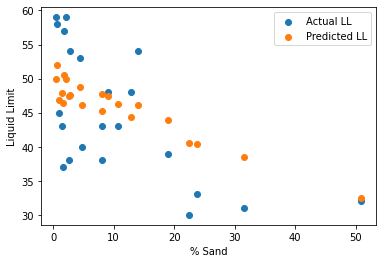

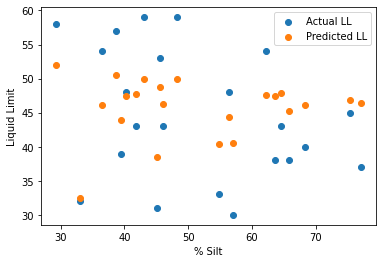

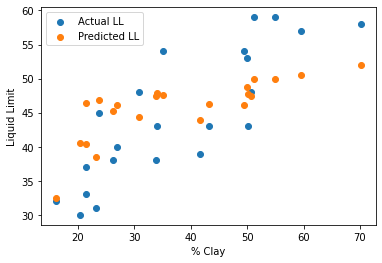

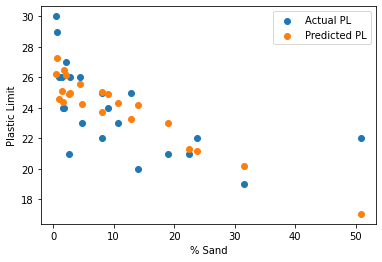

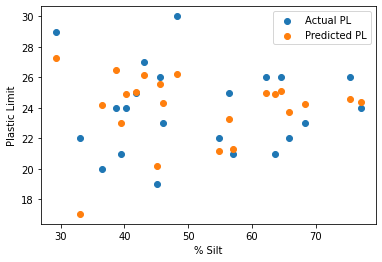

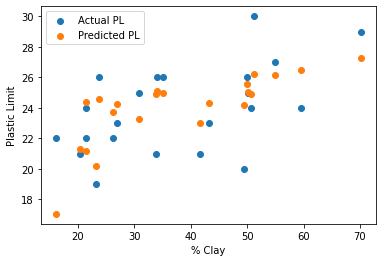

In [48]:
import matplotlib.pyplot as plt

fig1,sand=plt.subplots()
sand.scatter(df['sand'],df['ll'])
sand.scatter(df['sand'],df['predicted_ll'])
sand.legend(("Actual LL","Predicted LL"))
sand.set_xlabel("% Sand")
sand.set_ylabel("Liquid Limit")

fig2,silt=plt.subplots()
silt.scatter(df['silt'],df['ll'])
silt.scatter(df['silt'],df['predicted_ll'])
silt.legend(("Actual LL","Predicted LL"))
silt.set_xlabel("% Silt")
silt.set_ylabel("Liquid Limit")

fig3,clay=plt.subplots()
clay.scatter(df['clay'],df['ll'])
clay.scatter(df['clay'],df['predicted_ll'])
clay.legend(("Actual LL","Predicted LL"))
clay.set_xlabel("% Clay")
clay.set_ylabel("Liquid Limit")


# Plastic Limit
fig1,sand=plt.subplots()
sand.scatter(df['sand'],df['pl'])
sand.scatter(df['sand'],df['predicted_pl'])
sand.legend(("Actual PL","Predicted PL"))
sand.set_xlabel("% Sand")
sand.set_ylabel("Plastic Limit")

fig2,silt=plt.subplots()
silt.scatter(df['silt'],df['pl'])
silt.scatter(df['silt'],df['predicted_pl'])
silt.legend(("Actual PL","Predicted PL"))
silt.set_xlabel("% Silt")
silt.set_ylabel("Plastic Limit")

fig3,clay=plt.subplots()
clay.scatter(df['clay'],df['pl'])
clay.scatter(df['clay'],df['predicted_pl'])
clay.legend(("Actual PL","Predicted PL"))
clay.set_xlabel("% Clay")
clay.set_ylabel("Plastic Limit")


